# Introduction to Naive Bayes

The Naive Bayes algorithm predicts future opportunities based on previous experience, so it is known as Bayes' Theorem. The main characteristic of the Naive Bayes Classifier is the very strong assumption of independence of each condition/event.

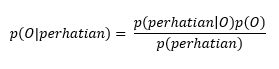

These three values can be calculated based on data collected from the questionnaire. Generally, we
not only computes P(O | perhatian), but also computes P(A | perhatian), P(B | perhatian), and P(AB | perhatian). After we count all four, the blood type with the greatest chance is ours
Prediction as Kak Lulu's blood type.

However, researchers usually want a formula with as few variables as possible. If we think about it further, the denominator of p(O|perhatian) is divided by p(perhatian). Similarly, p(A | perhatian), p(B | perhatian), and P(AB | perhatian) are also divided by p(perhatian) as can be seen in the formulas below.

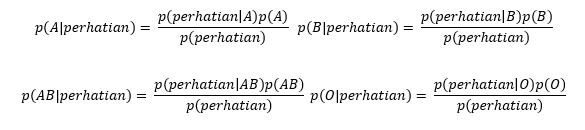

If all four variables have the same divisor, doesn't this mean that the order of values P(A|perhatian),
P(B|perhatian), P(AB|perhatian), and P(O|perhatian) from largest to smallest will not change even if the denominator (p(perhatian)) is crossed out? So we don't need to calculate the value of p(perhatian).

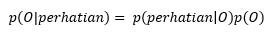

Pay perhatian to the formula above (the formula when division by P(perhatian) is omitted).
This value only calculates the probability of having blood type O if only the factor that Kak Lulu is caring is taken into account. How about factors such as intelligence, patience, thoroughness, or character
someone else? Mathematically, we can use the chain rule formula for
take into account these other factors as shown in the formula below.

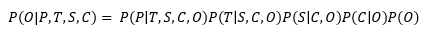

Information :
* Q: thorough
* C: smart
* S: Be patient
* P: attention
* O: blood type O

Fortunately, in the context of the Naive Bayes Classifier, we can assume that factors like
conscientious, intelligent, and so on are independent factors that are not influenced by variables
other. This means that the formula above can be simplified as follows:

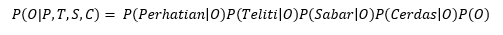

# B. Naive Bayes in Scikit Learn

Scikit-learn provides several variations of the naive Bayes model that can be used, among others

| Model Name | Module Name |
| ----------- | --------- |
| Gaussian Naive Bayes | `sklearn.naive_bayes.GaussianNB` |
| Multinomial Naive Bayes | `sklearn.naive_bayes.MultinomialNB` |
| Complement Naive Bayes | `sklearn.naive_bayes.ComplementNB` |
| Bernoulli Naive Bayes | `sklearn.naive_bayes.BernoulliNB` |
| Categorical Naive Bayes | `sklearn.naive_bayes.CategoricalNB` |

The uses of each model include:
- Gaussian Naive Bayes,
This model is suitable for numerical data that follows a Gausian and continuous distribution.

- Multinomial Naive Bayes,
The assumption that the data used has a simple multinomial distribution. The multinomial distribution describes the probability of the amount of data in a number of categories so that the naive Bayes model is suitable for use on features that represent the number or rate of increase. An example is text classification where the features are related to the frequency of words in the document that you want to classify.

- Complement,
Complement naive Bayes is similar to multinomial naive Bayes. This model exists because the multinomial naive Bayes model does not perform well for imbalanced datasets where the data distribution is not uniform. As a result, the model data is easily overfitted following much larger amounts of data. This complement naive Bayes model is suitable for imbalanced datasets.
https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e

- Bernoulli Naive Bayes,
Bernouli is similar to multinomial but the data has a discrete form and is distributed in binary form, for example in gender data, binary hot encoding, etc. https://iq.opengenus.org/bernoulli-naive-bayes/

- Categorical Naive Bayes,
Naive Bayes model for data types whose values are categorically distributed. If the data you have is continuous then it must be transformed into discrete form first to use this model. For example, data on eye color, race, blood type, etc.
https://inblog.in/Categorical-Naive-Bayes-Classifier-implementation-in-Python-dAVqLWkf7E


More details can be seen in the module documentation [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).

## Hands On

The dataset in example.csv contains information about whether or not a caesarean section was performed by 80 pregnant women with characteristics of medically important birth problems.

Dataset information:

`Age` = Age

`Delivery No` = Status (On time, premature, late)

`Blood of Pressure` = Blood Pressure (low, normal, high)

`Heart Problem` = Having heart disease problems (apt, inept)

`Cesarian` = Caesarean section was performed (yes, no)

Dataset source: https://www.kaggle.com/amir75/caesarean-section-classification

## Import data

In [ ]:
# import library dan data
import pandas as pd
import numpy as np
caesarian = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/example.csv')
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [ ]:
#Find the number of unique values in a column of categorical type
for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(caesarian[col].value_counts(),'\n')

No. of unique values in column Delivery No:
Timely       46
Premature    17
Latecomer    17
Name: Delivery No, dtype: int64 

No. of unique values in column Blood of Pressure:
Normal    40
High      20
Low       20
Name: Blood of Pressure, dtype: int64 

No. of unique values in column Heart Problem:
apt      50
inept    30
Name: Heart Problem, dtype: int64 

No. of unique values in column Caesarian:
Yes    46
No     34
Name: Caesarian, dtype: int64 



## Independent Variables & Dependent Variable
In this step, we will determine the variables that are the independent and dependent variables. The caesarian variable becomes the dependent variable and the other variables become independent variables.

We will perform one hot encoding to convert our dataset into an integer data type so that it can be used in the model.

In [ ]:
# Proses Encoding menggunakan One-Hot encoding

df_dummy = pd.get_dummies(caesarian,drop_first=True)
df_dummy.head()

,Age,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_inept,Caesarian_Yes
0,22,0,1,0,0,0,0
1,26,0,1,0,1,0,1
2,26,1,0,0,1,0,0
3,28,0,1,0,0,0,0
4,22,0,1,0,1,0,1


In [ ]:
# Variabel independen
x = df_dummy.drop(["Caesarian_Yes"], axis = 1)
x.head()

# Variabel dependen
y = df_dummy["Caesarian_Yes"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Caesarian_Yes, dtype: uint8

## Classification
Classification using Naive Bayes is in the Sklearn package. This classification requires testing data and training data. We will take 20% of the existing data as a test. The following is the program code to determine testing data and training data.

In [ ]:
# Splitting train and test data (0.2 test_size)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

After that, we will activate/call/create the Naive Bayes classification function and enter the training data into the Gaussian Naive Bayes classification function.

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Activate/call/create the Naive Bayes classification function
modelnb = GaussianNB()
# Enter training data into the Naive Bayes classification function
nbtrain = modelnb.fit(x_train, y_train)

The next step we will take is to determine the prediction results from x_test.

In [ ]:
# Prediction of data test
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

The program code output y_pred is the prediction result of a caesarean section. Then, we will compare these results with the actual data, namely y_test, using the following program code.

In [ ]:
# Array data test
np.array(y_test)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=uint8)

## Confusion Matrix
Confusion matrix is a matrix that contains prediction accuracy. The following is how to display a confusion matrix from Caesarian data.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[6, 3],
       [5, 2]])

The confusion matrix output above certainly makes it easier to read the accuracy of predictions, but we will tidy up the confusion matrix so that it is much easier for us to read it.

In [ ]:
# Tidying up the confusion matrix results
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_pred), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

prediction,0,1
actual,,
0,6,3
1,5,2


In the output, we can see that there were 6 pregnant women who were predicted to have a normal delivery and in actual circumstances they actually had a normal delivery. Meanwhile, the number of pregnant women who were predicted to have a normal delivery but in actual circumstances gave birth by caesarean was also 5. Then, there were 2 pregnant women who were predicted to give birth by caesarean and in actual circumstances actually gave birth by caesarean. Meanwhile, there were 3 pregnant women who were predicted to give birth by caesarean section but in actual circumstances gave birth normally.

## Classification Report
The final step we will take is to display the evaluation results of the classification using the Naive Bayes method.

In [ ]:
# Creating classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.40      0.29      0.33         7

    accuracy                           0.50        16
   macro avg       0.47      0.48      0.47        16
weighted avg       0.48      0.50      0.48        16



Drug Classification

In this lab session you are asked to apply naive Bayes classification to the `drug.csv` dataset.

## Features in dataset drug.csv:
`Age` : Age of the Patient

`Sex` : Gender of the patients

`BP` : Blood Pressure Levels

`Cholestrol` : Cholestrol Levels

`Na_to_K` : Sodium to potassium Ration in

`Drug` : Drug Type

Dataset Description (number of attributes, number of data, number of invalid data, and simple exploration)

In [ ]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import sys
%matplotlib inline

In [ ]:
# import dataset
drug = pd.read_csv('https://raw.githubusercontent.com/iqrafarhan/KASDD/main/drug.csv')
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
# View data information for each dataset column
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


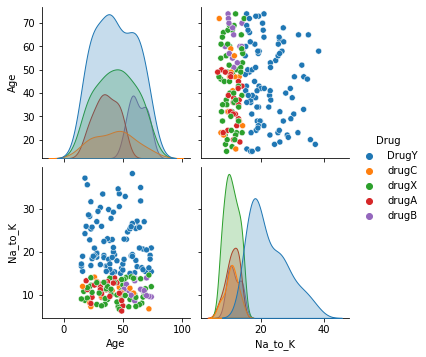

In [ ]:
# EDA
import seaborn as sns
sns.pairplot(drug,hue ='Drug')

In [ ]:
# Preprocessing menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
drug['Sex'] = label.fit_transform(drug['Sex'])
drug['BP'] = label.fit_transform(drug['BP'])
drug['Cholesterol'] = label.fit_transform(drug['Cholesterol'])

From the dataset provided, the graph above shows that the data has a normal distribution, so the naive Bayes model that is suitable to use is the Gaussian model.

Looking at the distribution of the dataset, the suitable model to use is the Gausian Naive Bayes model.

Split the dataset into features and target classes (fraudulent & winner) into the variables `X` and `y` respectively. Divide the dataset into 80% *training* data and 20% *testing* data. Train using the Naive Bayes algorithm that you chose in question number 1 using training data and use the algorithm that has been trained to make predictions on testing data.

In [ ]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY


In [ ]:
# Independent variable
x = drug.drop(["Drug"], axis = 1)
x.head()

# Dependent variable
y = drugs["Drugs"]
y.head()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Activate/call/create the Naive Bayes classification function
modelnb = GaussianNB()
# Enter training data into the Naive Bayes classification function
nbtrain = modelnb.fit(x_train, y_train)

In [ ]:
# Prediction of test data
y_pred = nbtrain.predict(x_test)
y_pred

array(['DrugY', 'drugX', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugA', 'drugX', 'drugC', 'drugC', 'DrugY', 'drugX', 'DrugY',
       'drugB', 'drugB', 'drugC', 'DrugY', 'drugA', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugA', 'DrugY', 'drugX', 'DrugY', 'drugA', 'DrugY', 'drugB',
       'DrugY', 'DrugY', 'drugX', 'drugX', 'drugA'], dtype='<U5')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  3,  0,  1,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  9]])

In [ ]:
# Tidying up the confusion matrix results
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_pred), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

prediction,DrugY,drugA,drugB,drugC,drugX
actual,,,,,
DrugY,19,3,0,1,0
drugA,0,2,0,0,0
drugB,0,0,3,0,0
drugC,0,0,0,3,0
drugX,0,0,0,0,9


Evaluation

In [ ]:
# Creating classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       1.00      0.83      0.90        23
       drugA       0.40      1.00      0.57         2
       drugB       1.00      1.00      1.00         3
       drugC       0.75      1.00      0.86         3
       drugX       1.00      1.00      1.00         9

    accuracy                           0.90        40
   macro avg       0.83      0.97      0.87        40
weighted avg       0.95      0.90      0.91        40



Each Naive Bayes algorithm is actually created for certain types of data, such as Gaussian for numerical data, Bernoulli for data with a binary distribution, and so on. One idea or strategy for handling mixed data cases using Naive Bayes is to change the mixed data into one type of data. In the case of the dataset above, an operation was carried out to convert categorical data into numerical data so that the Gaussian model could be used. In the dataset above there are features that are encoded into numerical type data. So, what is categorical is only the target of the data that you want to execute.